In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Подключаем датафрейм
%store -r data

In [3]:
data.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,totalSleep,totalKilocalories,...,activeSeconds,currentDayRestingHeartRate,bodyBattery.chargedValue,bodyBattery.drainedValue,allDayStress.averageStressLevel,allDayStress.averageStressLevelIntensity,allDayStress.totalDuration,allDayStress.lowDuration,allDayStress.mediumDuration,allDayStress.highDuration
0,2021-01-02 02:51:00,2021-01-02 11:01:00,2021-01-02,3300.0,20520.0,5460.0,120.0,0.0,29400.0,1762.0,...,5995,64,46.0,73.0,52,49,56700,13980.0,16740.0,5820.0
1,2021-01-03 03:34:00,2021-01-03 12:00:00,2021-01-03,3900.0,18000.0,8340.0,120.0,0.0,30360.0,1704.0,...,4325,64,34.0,33.0,50,49,55920,17220.0,18540.0,3300.0
2,2021-01-04 03:33:00,2021-01-04 10:44:00,2021-01-04,0.0,11880.0,13920.0,60.0,0.0,25860.0,1628.0,...,4544,66,77.0,41.0,33,27,60240,16020.0,5700.0,1380.0
3,2021-01-05 02:31:00,2021-01-05 12:04:00,2021-01-05,6300.0,16200.0,11820.0,60.0,0.0,34380.0,1571.0,...,2575,66,64.0,47.0,30,24,51960,9240.0,6240.0,660.0
4,2021-01-06 04:14:00,2021-01-06 11:53:00,2021-01-06,1380.0,19140.0,7020.0,0.0,0.0,27540.0,1910.0,...,6908,65,42.0,70.0,35,28,58680,9180.0,7800.0,1440.0


In [4]:
# Функция расчет количества групп для гистограммы

def group_number(x):
    return round(3.31*np.log10(len(x))+1)

In [5]:
# Определяем число групп для количества наблюдений:

n = group_number(data['totalSleep'])
n

10

In [6]:
# Группируем данные и  сситаем количество наблюдений в группах

total_sleep_count = pd.cut(data['totalSleep'].div(3600).round(1), n).value_counts().to_frame().reset_index().sort_values(by='totalSleep')
total_sleep_count.head()

,totalSleep,count
6,"(1.288, 2.47]",4
7,"(2.47, 3.64]",4
5,"(3.64, 4.81]",15
3,"(4.81, 5.98]",38
1,"(5.98, 7.15]",201


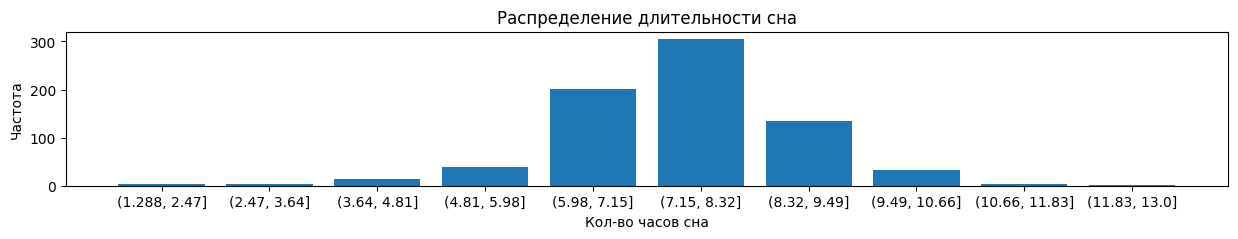

In [7]:
# Гистограмма распределения длительности сна

plt.figure(figsize=(15, 2))
plt.bar(total_sleep_count['totalSleep'].astype(str),total_sleep_count['count'])
plt.title('Распределение длительности сна')
plt.xlabel('Кол-во часов сна') # Подпись оси x
plt.ylabel('Частота') # Подпись оси y
plt.show()

Text(0, 0.5, 'Кол-во часов сна')

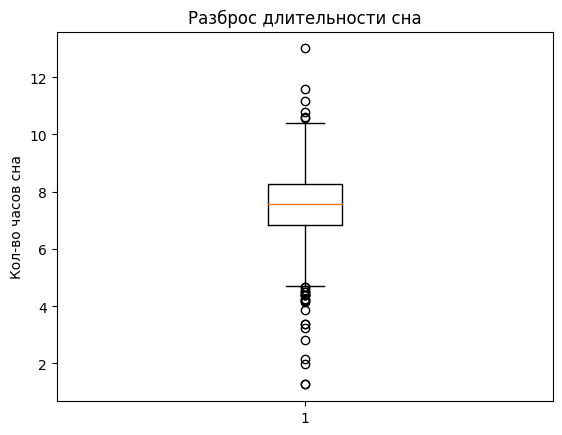

In [8]:
# Смотрим выбросы

plt.boxplot(data['totalSleep'].div(3600))
plt.title('Разброс длительности сна') # Заголовок таблицы
plt.ylabel('Кол-во часов сна') # Подпись оси x

In [9]:
# Выводим статистику

sleep_stat = data[['deepSleepSeconds', 'lightSleepSeconds','remSleepSeconds', 'awakeSleepSeconds']].describe().div(3600).T
sleep_stat

,count,mean,std,min,25%,50%,75%,max
deepSleepSeconds,0.205,1.012308,0.641097,0.000000,0.55,0.950000,1.416667,3.400000
lightSleepSeconds,0.205,5.109598,1.085341,0.650000,4.50,5.133333,5.816667,8.750000
remSleepSeconds,0.205,1.309530,0.715958,0.016667,0.75,1.250000,1.800000,4.116667
awakeSleepSeconds,0.205,0.067999,0.148141,0.000000,0.00,0.016667,0.050000,1.166667


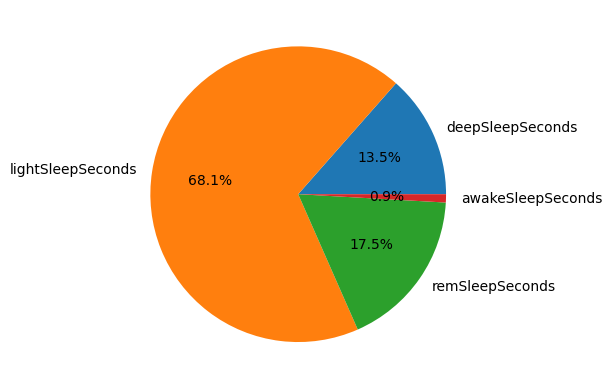

In [10]:
# Смотрим структуру сна

plt.pie(round(sleep_stat['mean']/sleep_stat['mean'].sum()*100,1), labels = sleep_stat.index, autopct='%1.1f%%')
plt.show()

In [11]:
# Преобразование времени отходу ко сну к ед.изм "Кол-во часов до (-)/после (+) полуночи"

start_time = data['sleepStartTimestampGMT'] - pd.to_datetime(data['sleepStartTimestampGMT'].dt.date)
start_time = round(start_time.dt.seconds/3600,2)

start_AM = start_time.where(start_time<18, other=start_time-24)

In [12]:
# Преобразование длительности сна в часы

duration = data['sleepEndTimestampGMT'] - data['sleepStartTimestampGMT']
duration = round(duration.dt.seconds/3600,2)

In [13]:
# Подготовка датафрейма для построения графика

duration_bar = pd.DataFrame({'date': data['calendarDate'],'start': start_AM, 'duration': duration})

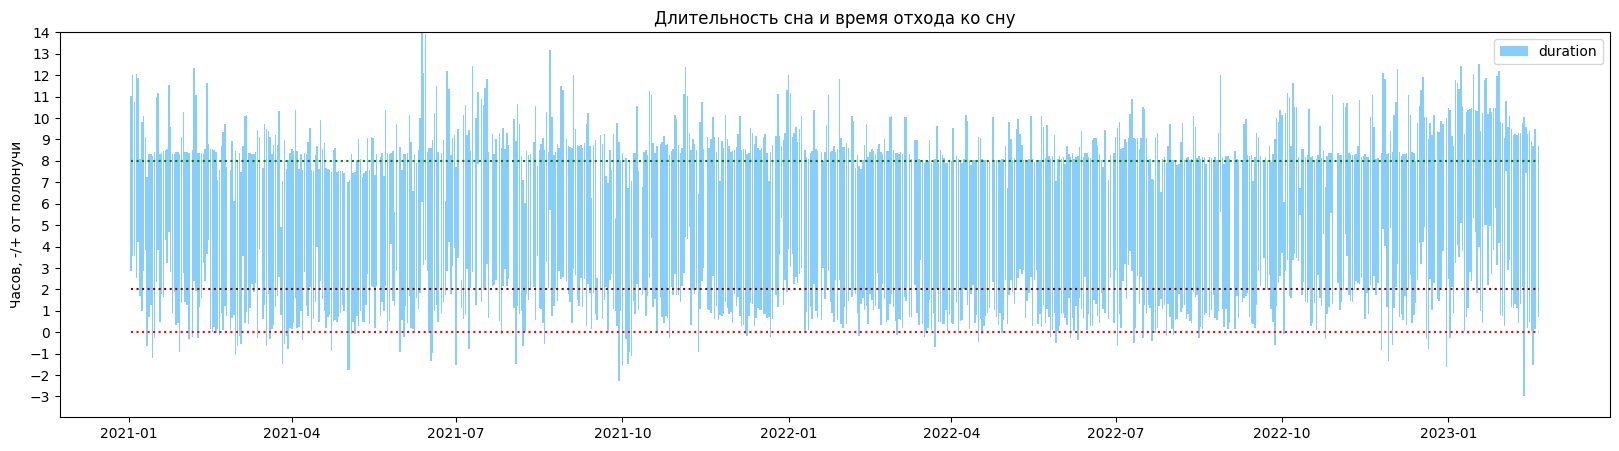

In [14]:
# График длительности сна и времени отхода ко сну за весь период

plt.figure(figsize=(20, 5))
labels = duration_bar['date']
#plt.bar(labels, duration_bar['start'], label='start time')
plt.bar(labels, duration_bar['duration'], label = 'duration',  bottom=duration_bar['start'], color ='lightskyblue')
plt.legend()
plt.ylim(duration_bar['start'].min()-1,duration_bar['duration'].max()+1 )
plt.ylabel('Часов, -/+ от полонучи') # Подпись оси x
plt.savefig('saved_figure.png', dpi=1000)
plt.hlines(0, labels.min(), labels.max(), 'red',':')
plt.hlines(2, labels.min(), labels.max(), 'darkred',':')
plt.hlines(8, labels.min(), labels.max(), 'green',':')
plt.yticks(np.arange(round(duration_bar['start'].min()),round(duration_bar['duration'].max())+2,1))
plt.title('Длительность сна и время отхода ко сну')
plt.show()

In [15]:
duration_bar[['start', 'duration']].describe()

,start,duration
count,738.000000,738.000000
mean,1.384648,7.508794
std,1.395167,1.294736
min,-2.970000,1.270000
25%,0.455000,6.830000
50%,1.170000,7.580000
75%,2.165000,8.270000
max,7.830000,13.000000
